Name: AISHWARIYA S
Reg No: 212224240005
Epoch [0/2000], Loss: 0.416988
Epoch [200/2000], Loss: 0.226349
Epoch [400/2000], Loss: 0.226349
Epoch [600/2000], Loss: 0.226349
Epoch [800/2000], Loss: 0.226349
Epoch [1000/2000], Loss: 0.226349
Epoch [1200/2000], Loss: 0.226355
Epoch [1400/2000], Loss: 0.226370
Epoch [1600/2000], Loss: 0.226363
Epoch [1800/2000], Loss: 0.226365
Test Loss: 0.234991
Name: AISHWARIYA
Reg No: 212224240005


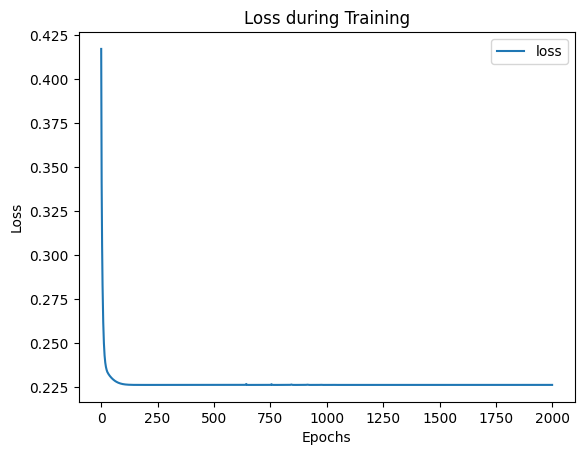

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

dataset1 = pd.read_csv('StudentsPerformance[1].csv')

# Initialize LabelEncoders
le_gender = LabelEncoder()
le_lunch = LabelEncoder()

# Encode categorical features to numerical
X = le_gender.fit_transform(dataset1['gender']).reshape(-1, 1)
y = le_lunch.fit_transform(dataset1['lunch']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

print("Name: AISHWARIYA S")
print("Reg No: 212224240005")

yuvas = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(yuvas.parameters(), lr=0.001)

def train_model(yuvas, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(yuvas(X_train), y_train)
        loss.backward()
        optimizer.step()

        yuvas.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

train_model(yuvas, X_train_tensor, y_train_tensor, criterion, optimizer)

with torch.no_grad():
    test_loss = criterion(yuvas(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

loss_df = pd.DataFrame(yuvas.history)
import matplotlib.pyplot as plt

loss_df.plot()
print("Name: AISHWARIYA")
print("Reg No: 212224240005")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()
